<a href="https://colab.research.google.com/github/RickOti23/Beginner/blob/main/Energy_Consumption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data load and environment setup

In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
df = pd.read_csv("/content/Energy_consumption_dataset.csv")


# Reading the data and doing data cleanup where possible

In [72]:
print(df.shape) #data has 5000 rows and 12 columns
print("\n")
df.head()

(5000, 12)




,Month,Hour,DayOfWeek,Holiday,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,EnergyConsumption
0,1,0,Saturday,No,25.139433,43.431581,1565.693999,5,On,Off,2.774699,75.364373
1,1,1,Saturday,No,27.731651,54.225919,1411.064918,1,On,On,21.831384,83.401855
2,1,2,Saturday,No,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,78.270888
3,1,3,Saturday,No,20.080469,50.371637,1452.316318,1,Off,On,8.623447,56.519850
4,1,4,Saturday,No,23.097359,51.401421,1094.130359,9,On,Off,3.071969,70.811732


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Month              5000 non-null   int64  
 1   Hour               5000 non-null   int64  
 2   DayOfWeek          5000 non-null   object 
 3   Holiday            5000 non-null   object 
 4   Temperature        5000 non-null   float64
 5   Humidity           5000 non-null   float64
 6   SquareFootage      5000 non-null   float64
 7   Occupancy          5000 non-null   int64  
 8   HVACUsage          5000 non-null   object 
 9   LightingUsage      5000 non-null   object 
 10  RenewableEnergy    5000 non-null   float64
 11  EnergyConsumption  5000 non-null   float64
dtypes: float64(5), int64(3), object(4)
memory usage: 468.9+ KB


In [84]:
days = {"1":"January","2":"February","3":"March","4":"April","5":"May","6":"June","7":"July","8":"August","9":"September","10":"October","11":"November","12":"December"}
df["Month"] = df["Month"].astype("str")

In [75]:
df[["LightingUsage","Holiday","HVACUsage"]] = df[["LightingUsage","Holiday","HVACUsage"]].astype("category")

# Exploratory data analysis

In [76]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Hour,5000.0,11.556000,6.888306,0.000000,6.000000,11.000000,18.000000,23.000000
Temperature,5000.0,24.946823,3.041678,20.007565,22.453790,24.831846,27.427281,29.998671
Humidity,5000.0,45.478146,8.972690,30.015975,38.111104,45.793124,52.696651,59.969085
SquareFootage,5000.0,1507.403201,293.147209,1000.512661,1253.906598,1513.581105,1754.846457,1999.982252
Occupancy,5000.0,4.576000,2.906185,0.000000,2.000000,5.000000,7.000000,9.000000
RenewableEnergy,5000.0,15.201195,9.157038,0.006642,7.477928,15.343830,22.889997,29.965327
EnergyConsumption,5000.0,76.794919,9.231573,53.263278,70.419588,76.696267,83.246274,99.201120


<Axes: xlabel='EnergyConsumption', ylabel='Count'>

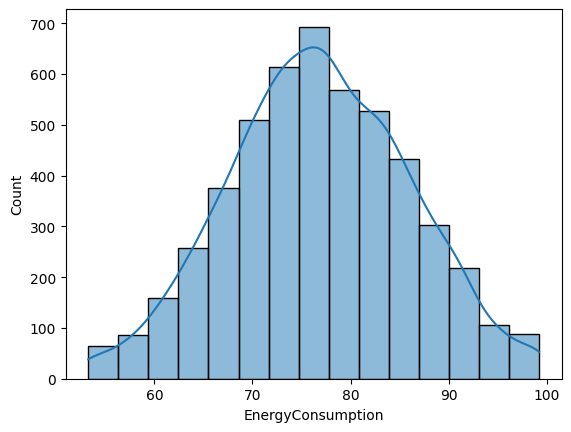

In [78]:
sns.histplot(x="EnergyConsumption",data=df,bins=15,kde=True)

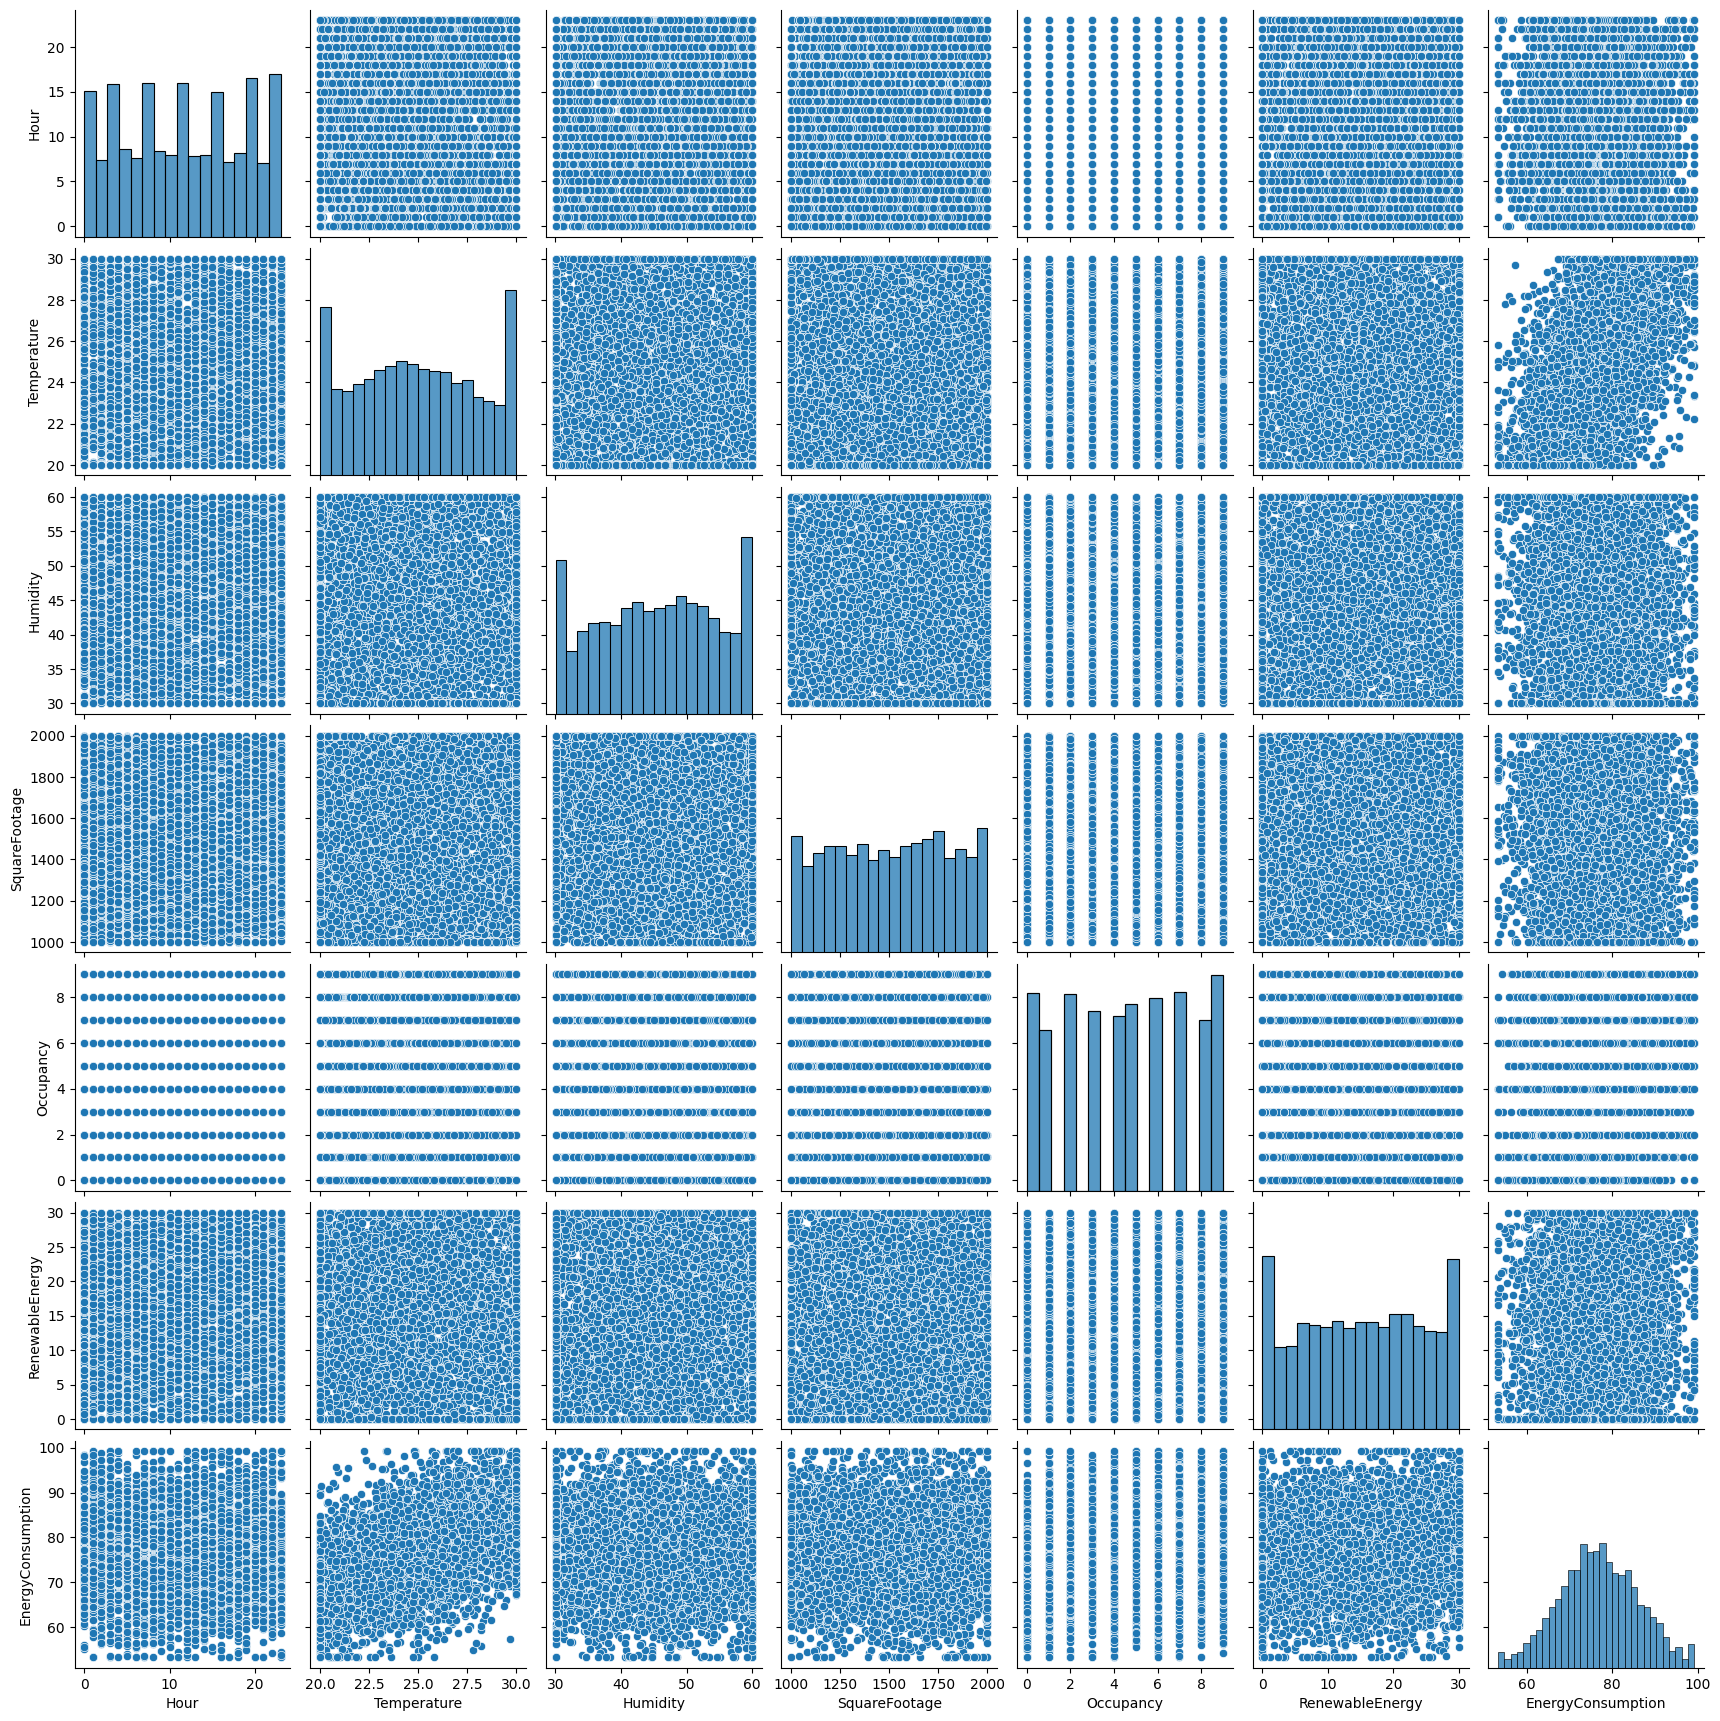

In [79]:
sns.pairplot(df)

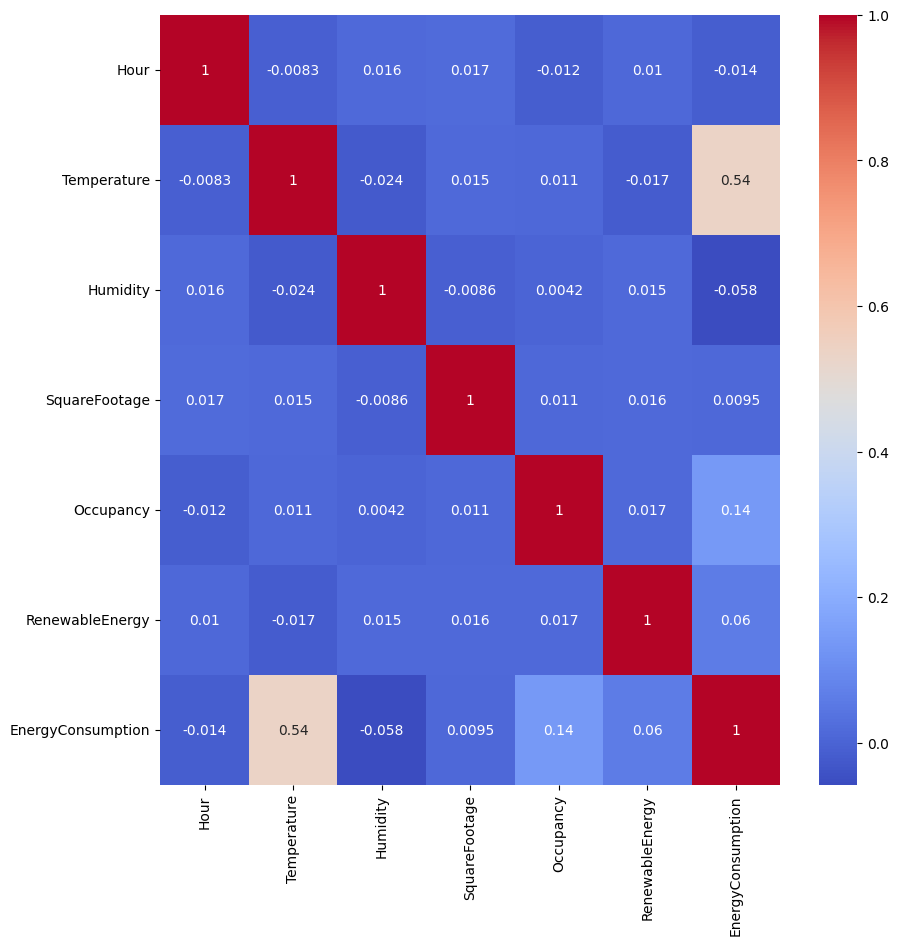

In [80]:
numeric_df = df.select_dtypes(include=[float, int])
numeric_df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(data=numeric_df.corr(),annot=True,cmap="coolwarm")
plt.show()
#there is a 0.5 correlation between temperature and energy consumption

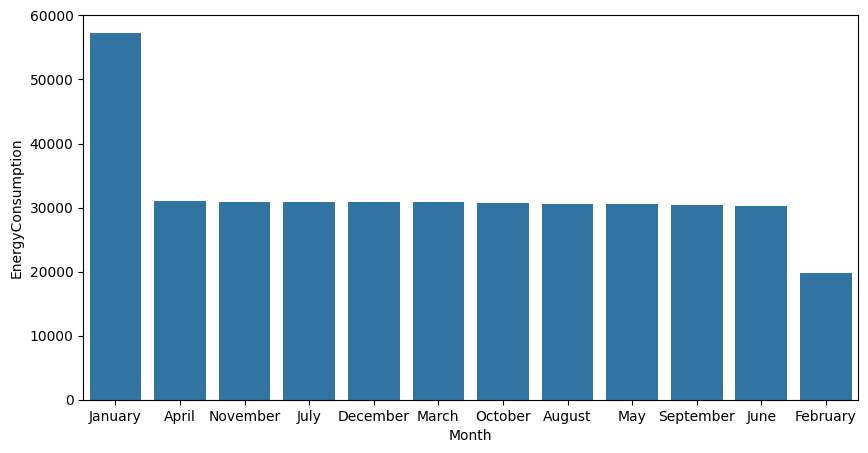

In [88]:
x = df.groupby(["Month"])["EnergyConsumption"].sum().reset_index()
x = x.sort_values("EnergyConsumption",ascending=False)
x["Month"] = x["Month"].map(days)
plt.figure(figsize=(10,5))
sns.barplot(x="Month",y="EnergyConsumption",data=x)
plt.show() #energy consumption high in the month of January

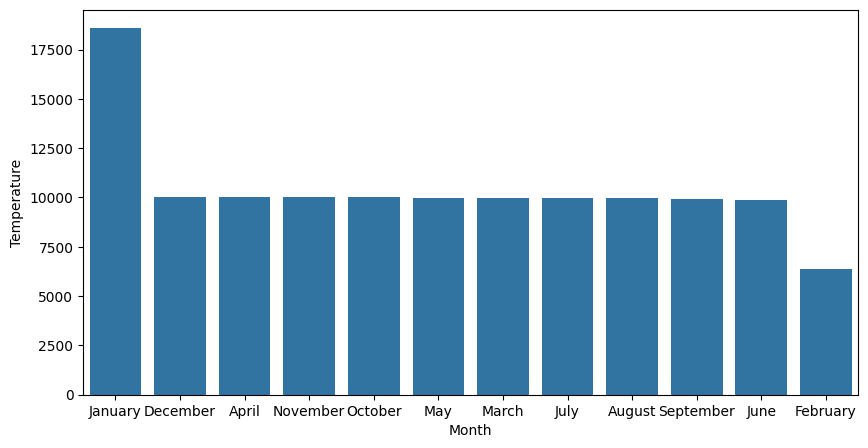

In [95]:
y = df.groupby(["Month"])["Temperature"].sum().reset_index()
y.sort_values("Temperature",ascending=False,inplace=True)
y["Month"] = y["Month"].map(days)
plt.figure(figsize=(10,5))
sns.barplot(x="Month",y="Temperature",data=y)
plt.show() #energy consumption high in the month of January

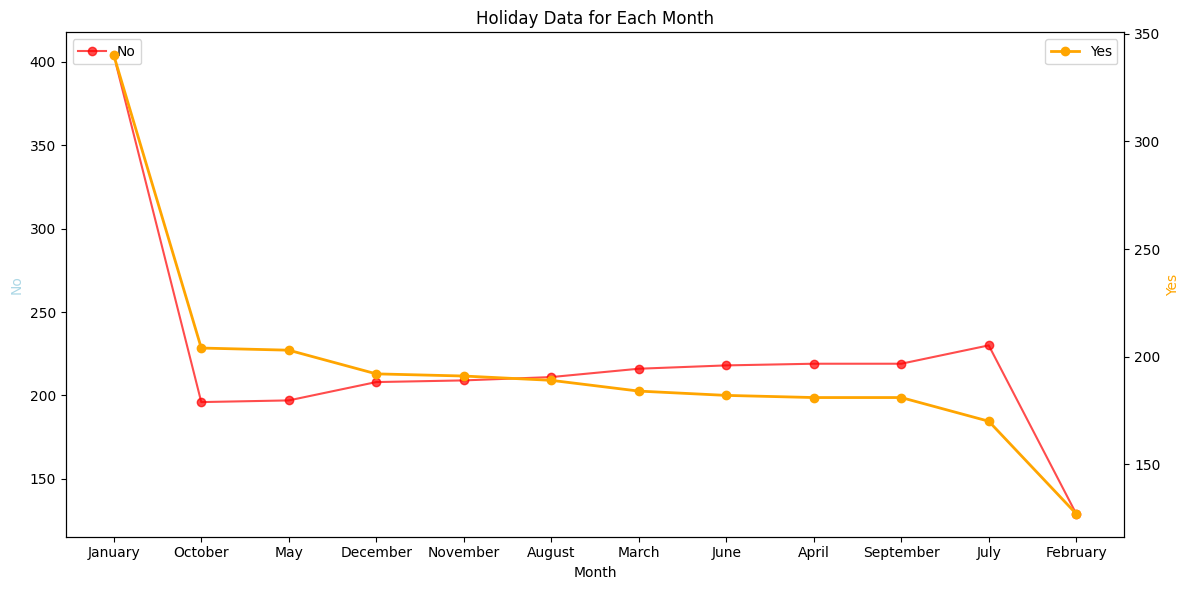

In [130]:
w = df.groupby("Month")["Holiday"].value_counts().unstack().reset_index()
w["Month"] = w["Month"].map(days)
w.sort_values(by="Yes",ascending=False,inplace=True)
fig, ax1 = plt.subplots(figsize=(12,6))

# Plotting the 'No' values as bars
# w['Holiday'] is the index, w.index should be used instead.
ax1.plot(w["Month"], w['No'], color='red', label='No', alpha=0.7,marker='o')

# Creating a second y-axis to plot 'Yes' values
ax2 = ax1.twinx()
# w['Holiday'] is the index, w.index should be used instead.
ax2.plot(w["Month"], w['Yes'], color='orange', marker='o', label='Yes', linewidth=2)

# Adding labels and title
ax1.set_xlabel('Month')
ax1.set_ylabel('No', color='lightblue')
ax2.set_ylabel('Yes', color='orange')
plt.title('Holiday Data for Each Month')

# Displaying the legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show the chart
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()